In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

from TradingEnv import TradingEnv

from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv


In [3]:
#Testing envs
TSLA_env = TradingEnv("../data/TSLA.csv", "TSLA")
MSFT_env = TradingEnv("../data/MSFT.csv", "MSFT")
AAPL_env = TradingEnv("../data/AAPL.csv", "AAPL")
BTC_env = TradingEnv("../data/BTC.csv", "BTC")
GME_env = TradingEnv("../data/GME.csv", "GME")
XRP_env = TradingEnv("../data/XRP.csv", "XRP")
NVDA_env = TradingEnv("../data/NVDA.csv", "NVDA")
COIN_env = TradingEnv("../data/COIN.csv", "COIN")
FTT_env = TradingEnv("../data/FTT.csv", "FTT")
TSLA_env.name


'TSLA'

In [18]:
net_worths = {}
for env in [TSLA_env, MSFT_env, AAPL_env, BTC_env, GME_env, XRP_env, NVDA_env, COIN_env, FTT_env]:
    net_worths[env] = []

In [24]:
def evaluate(model, env, Trading_bot_name,  episodes=1000):
    obs = env.reset()
    with open(f"..\Results\stable_baselines\{env.name}_{Trading_bot_name}_{episodes}.txt", "w") as file:
        for episode in range(episodes):
            action, _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            net_worths[env].append(env.net_worth)
            file.write(f"balance {env.balance}: Reward = {reward}, action : {action}, net worth : {env.net_worth}\n")
            if done:
                break

In [ ]:
Trading_bot_name = "Trading_bot_MSFT_10_000"
for env in [TSLA_env, MSFT_env, AAPL_env, BTC_env, GME_env, XRP_env, NVDA_env, COIN_env, FTT_env]:
    model = A2C.load(f"..\Models\{Trading_bot_name}", env=env)
    evaluate(model, env, Trading_bot_name)
    env.close()
    del model

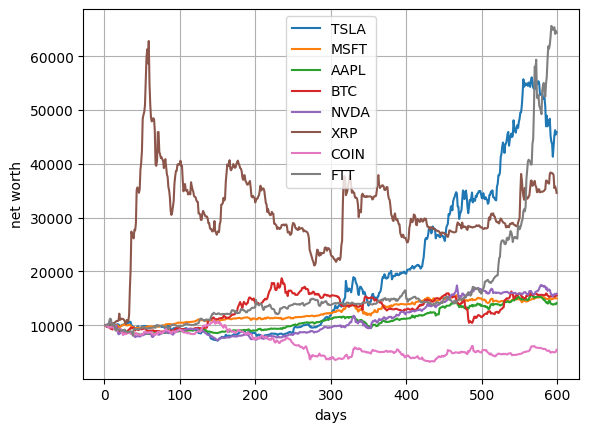

In [31]:
x = np.arange(2, 600, 1)
for env in [TSLA_env, MSFT_env, AAPL_env, BTC_env, NVDA_env, XRP_env, COIN_env, FTT_env]:
    plt.plot(x, net_worths[env][2:600], label=env.name)
plt.legend()
plt.grid()
plt.xlabel("days")
plt.ylabel("net worth")
plt.show()

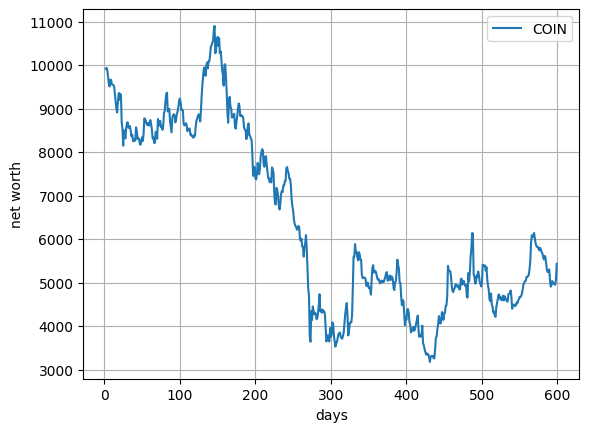

In [35]:
for env in [COIN_env]:
    plt.plot(x, net_worths[env][2:600], label=env.name)
plt.legend()
plt.grid()
plt.xlabel("days")
plt.ylabel("net worth")
plt.show()